In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

os.chdir("C:/Users/admin")
df=pd.read_csv("gfr.data.revise.csv")
df

,h26,h27,h28,h29,h30,r1
0,NaN,NaN,NaN,75.0,NaN,69.3
1,59.5,NaN,47.5,NaN,NaN,NaN
2,102.8,87.4,87.1,NaN,NaN,NaN
3,57.9,NaN,NaN,NaN,67.9,61.4
4,89.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4397,97.2,NaN,NaN,NaN,NaN,NaN
4398,67.3,50.7,67.6,63.3,49.2,NaN
4399,33.0,43.4,43.2,42.7,NaN,NaN
4400,60.7,61.8,64.6,65.1,55.9,60.8


In [2]:
df.isnull()#欠損値確認trueが欠損値あり

,h26,h27,h28,h29,h30,r1
0,True,True,True,False,True,False
1,False,True,False,True,True,True
2,False,False,False,True,True,True
3,False,True,True,True,False,False
4,False,True,True,True,True,True
...,...,...,...,...,...,...
4397,False,True,True,True,True,True
4398,False,False,False,False,False,True
4399,False,False,False,False,True,True
4400,False,False,False,False,False,False


In [3]:
df.shape#（行、列）

(4402, 6)

In [4]:
df.isnull().sum()#欠損している要素数

h26    2099
h27    1970
h28    2037
h29    2111
h30    2159
r1     2338
dtype: int64

In [5]:
df.info()#データの要約を表示する（欠損値の確認）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   h26     2303 non-null   float64
 1   h27     2432 non-null   float64
 2   h28     2365 non-null   float64
 3   h29     2291 non-null   float64
 4   h30     2243 non-null   float64
 5   r1      2064 non-null   float64
dtypes: float64(6)
memory usage: 206.5 KB


In [6]:
df.dropna(how='any',thresh=3)#欠損値を含む行や列を削除する#threshは欠損していない要素数が３以上の行のみを保持

,h26,h27,h28,h29,h30,r1
2,102.8,87.4,87.1,NaN,NaN,NaN
3,57.9,NaN,NaN,NaN,67.9,61.4
5,63.1,60.7,64.1,57.6,61.3,NaN
6,52.8,57.9,51.7,50.8,50.6,51.0
7,NaN,87.1,85.4,NaN,84.5,NaN
...,...,...,...,...,...,...
4390,NaN,64.6,69.4,65.6,74.6,76.5
4394,70.9,76.6,78.5,79.4,73.6,74.3
4398,67.3,50.7,67.6,63.3,49.2,NaN
4399,33.0,43.4,43.2,42.7,NaN,NaN


In [7]:
df = df.dropna(how='any',thresh=3)#欠損値を含む行や列を削除する#threshは欠損していない要素数が３以上の行のみを保持

In [8]:
df.interpolate(axis=1,limit_direction="both")# 列ごとに補間する

,h26,h27,h28,h29,h30,r1
2,102.8,87.4,87.1,87.10,87.1,87.1
3,57.9,60.4,62.9,65.40,67.9,61.4
5,63.1,60.7,64.1,57.60,61.3,61.3
6,52.8,57.9,51.7,50.80,50.6,51.0
7,87.1,87.1,85.4,84.95,84.5,84.5
...,...,...,...,...,...,...
4390,64.6,64.6,69.4,65.60,74.6,76.5
4394,70.9,76.6,78.5,79.40,73.6,74.3
4398,67.3,50.7,67.6,63.30,49.2,49.2
4399,33.0,43.4,43.2,42.70,42.7,42.7


In [9]:
df = df.interpolate(axis=1,limit_direction="both")# 列ごとに補間する

In [10]:
df.to_csv("1.csv" )#読み込めないのは、上書きができないだけ。名前を変えれば、読み込める。

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
from tslearn.clustering import KShape#tslearn.clusteringのkeshapeを読み込む
from tslearn.datasets import CachedDatasets#保存された時系列データセットにアクセス
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [13]:
df
trainArr = []#まずは要素を含まないものを定義
trainArr = df.values #valueは全ての値を取得する

In [14]:
df
trainArr_X = []#まずは要素を含まないものを定義

#次元数は２次元
trainArr_X = trainArr[:2367,:6]
#0行から2347行まで、0列目から5列目まで


trainArr_X = trainArr_X.reshape([2367,6,1])

print(trainArr_X.shape)    
   

(2367, 6, 1)


In [15]:
# For this method to operate properly, prior scaling is required
trainArr_X = TimeSeriesScalerMeanVariance().fit_transform(trainArr_X)
#TimeSeriesScalerMeanVarianceがデータを正規化してくれるクラス
#fitはデータを変換するために必要な統計情報を計算するだけで実行はしない
#transformで実際に正規化を実行する

In [16]:
df.shape#欠損していない要素数が３以上の行のみを保持していることを確認

(2367, 6)

In [17]:
df.isnull()#欠損している要素数

,h26,h27,h28,h29,h30,r1
2,False,False,False,False,False,False
3,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
...,...,...,...,...,...,...
4390,False,False,False,False,False,False
4394,False,False,False,False,False,False
4398,False,False,False,False,False,False
4399,False,False,False,False,False,False


In [18]:
df.isnull().sum()#欠損している要素数

h26    0
h27    0
h28    0
h29    0
h30    0
r1     0
dtype: int64

In [19]:
seed = 0
np.random.seed(seed)
ks = KShape(n_clusters=50, verbose= True, random_state=seed)
#クラスター５個,途中経過を出力する,乱数固定(同じ値を固定する)
#この一行で、AIのモデルの入力層～中間層～出力層を示している。

y_pred = ks.fit_predict(trainArr_X)
#fitはk-shapeクラスタリング計算
#predictはxを使用してk-shapeクラスタリングに適合させて
#xの各時系列データが属する最も近いクラスターを予測



Resumed because of empty cluster
0.011 --> 0.013 --> 


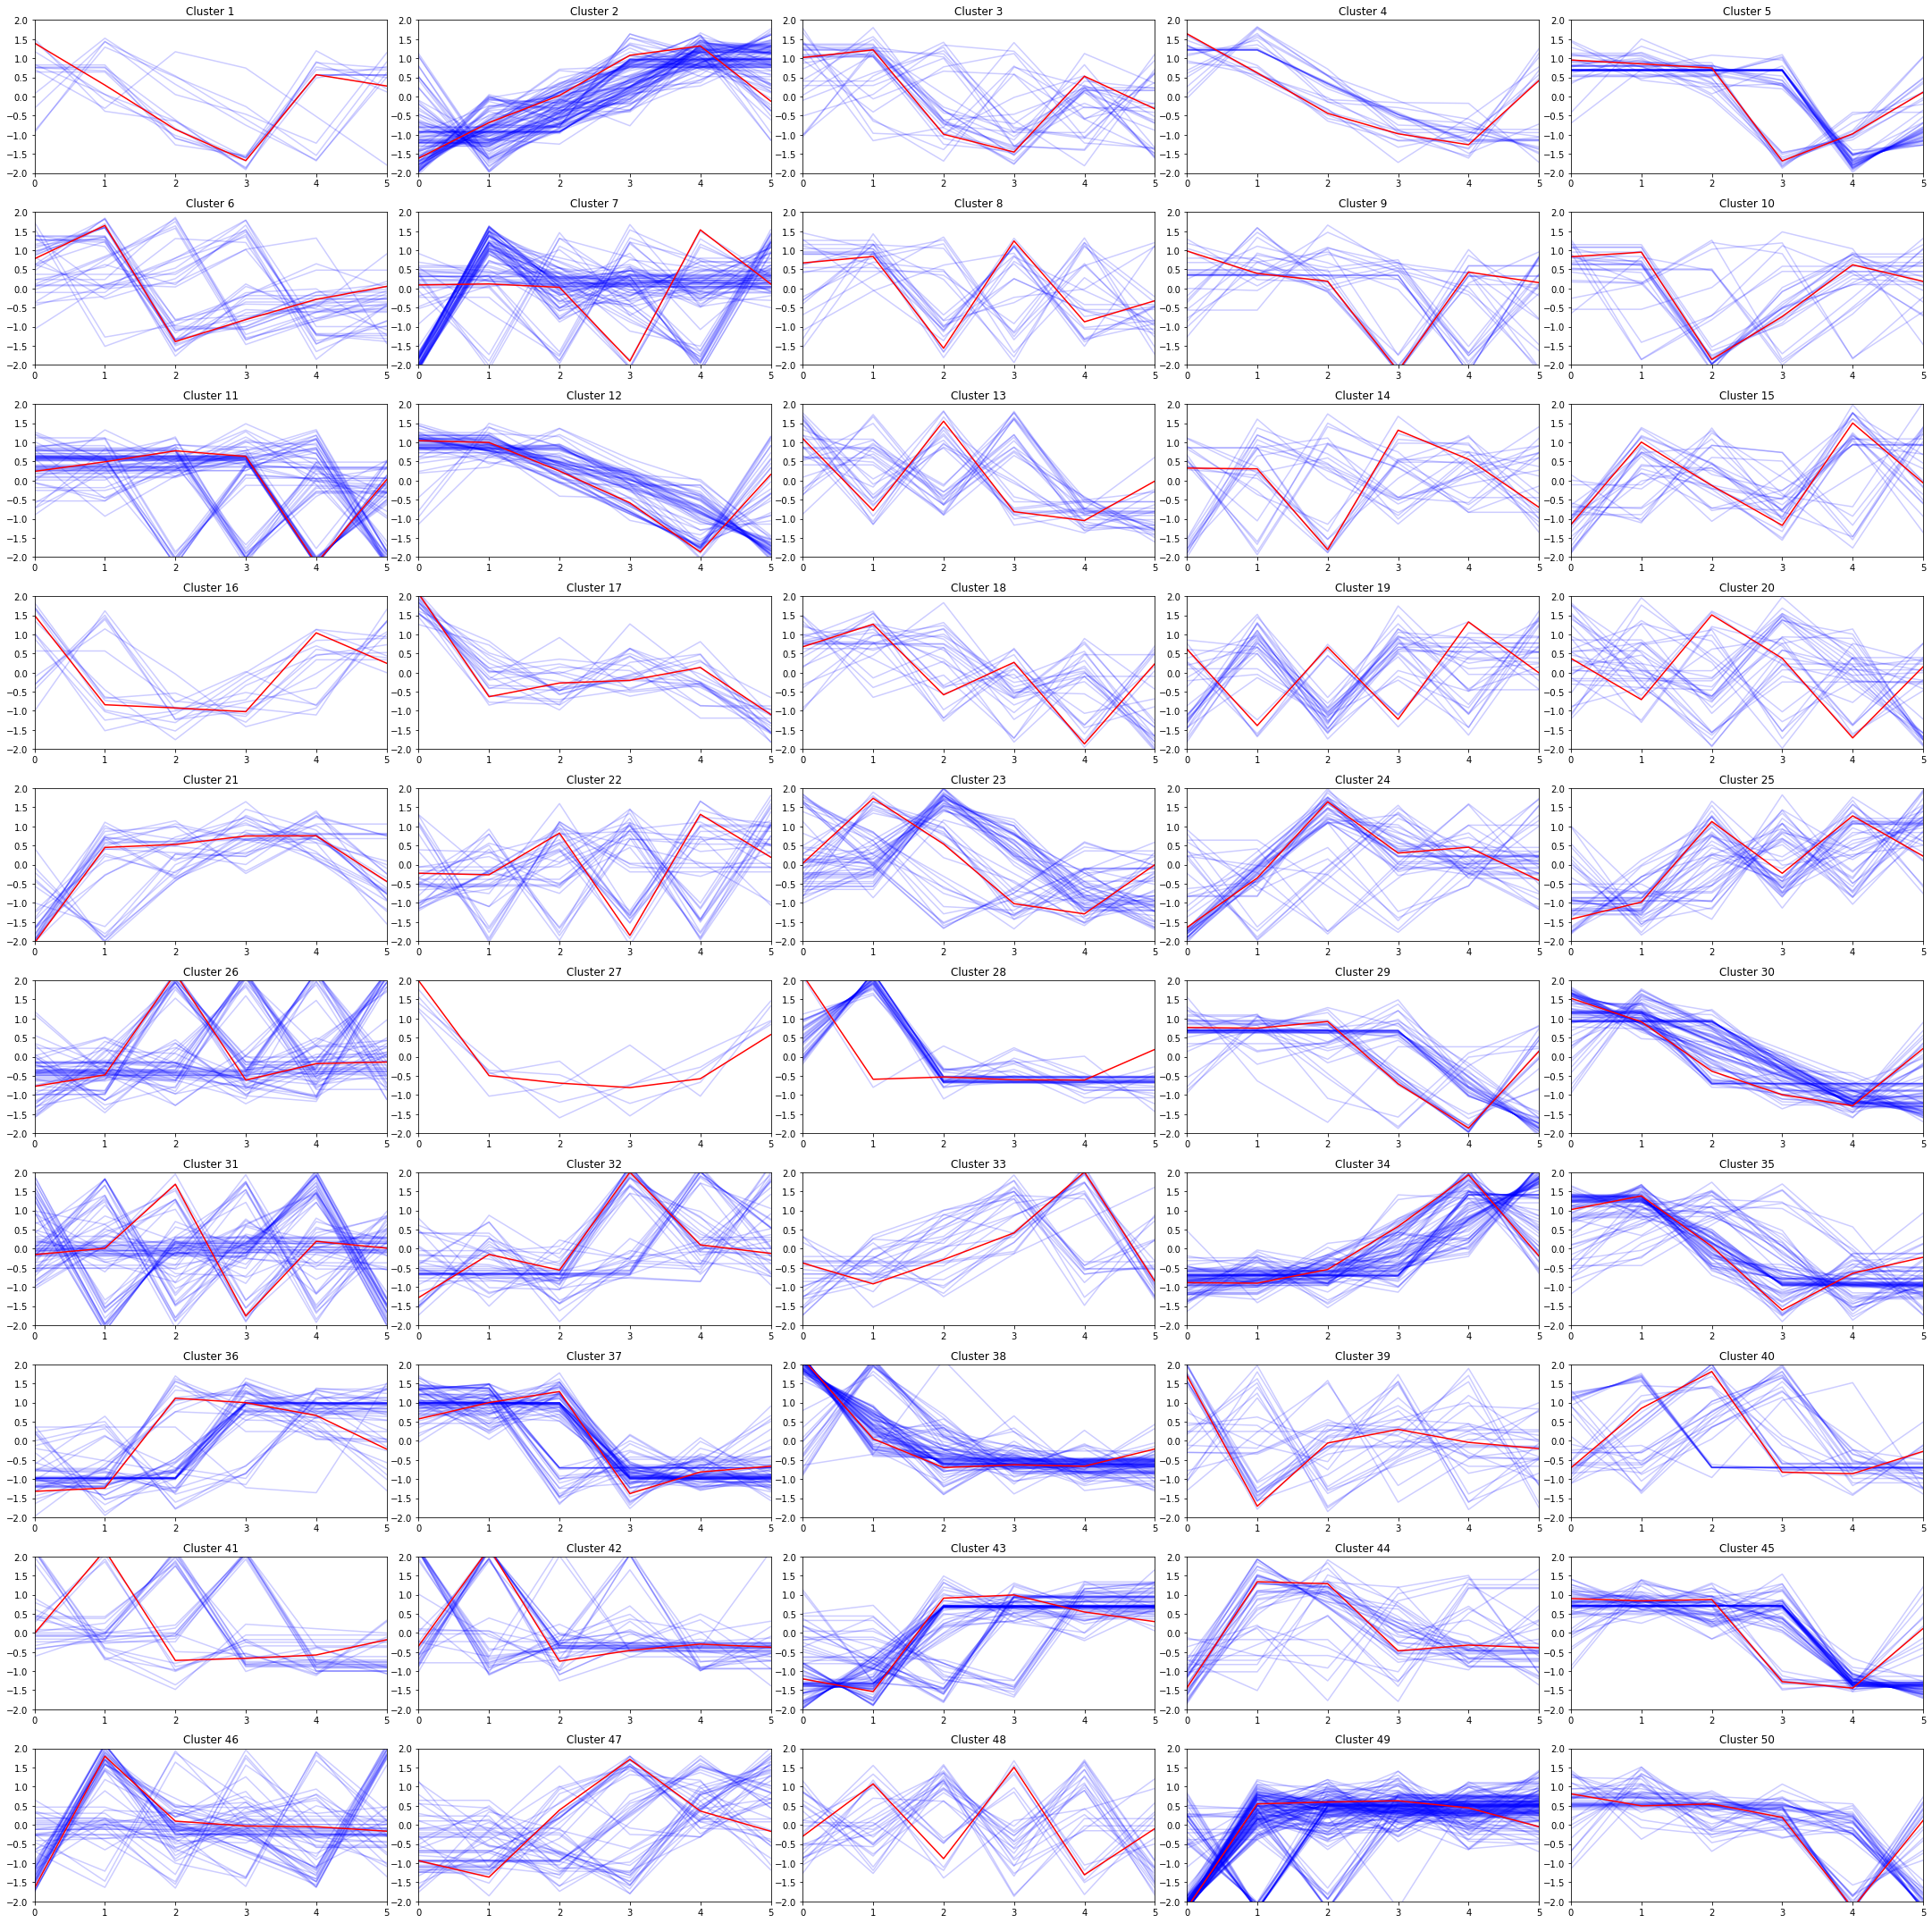

In [20]:

plt.figure(figsize=(30, 30), tight_layout = True)
#plt.figureでまず図をかくために紙を用意する
#figsizeで
#（横,縦）を指定する
# tightlayoutのtrueをすることでオブジェクトの配置が自動調整
#何を自動調整するかというと、オブジェクト同士が重なっていたらそれを避け、
#また無駄な余白があればそれを埋めるように各オブジェクトの配置が自動調整される。


for yi in range(50):#yiという変数名を５０回繰り返し処理
    
    
    plt.subplot(10, 5, 1 + yi) 
#pltsubplotをつけることでfigure（描画）とaxes（グラフ）が同時にできる
#pltsubplot（縦の数,横の数,exで1+1=2の二個目を作る。）

    for xx in trainArr_X[y_pred == yi]:
        plt.plot(xx.ravel(), "b-", alpha=.2)#b-はbrueでalphaは線の太さを表している。
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-",)

    plt.xlim(0, 5)#X軸のみの制限を設定
    plt.ylim(-2, 2)#y軸のみの制限を設定
    plt.title("Cluster %d" % (yi + 1))#クラスター名前

plt.show()#必須:図を表示させるときに使用

In [21]:
import openpyxl as excel #excelでどこに分類をされているかを出力される。
wb = excel.Workbook()
ws = wb.active
for i in range(2367):
    ws.cell(column=1,row=1,value="class")
    ws.cell(column=1,row=i+2,value=y_pred[i]+1)
wb.save("ooutput2.xlsx")

In [22]:
print(y_pred)

[37  1 47 ... 22 48  9]


In [23]:
y_pred[0]
print (y_pred)

[37  1 47 ... 22 48  9]
